#Apply different Architectures on MNIST dataset using Keras

---



In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

**Load the data**

---



In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [125]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [127]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [129]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [130]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 112
nb_epoch = 20
print(input_dim)

784


# Model 1 ->  with 2  Hidden layers

<h2> 1. MLP + ReLU + adam </h2>

---



In [131]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 610)               478850    
_________________________________________________________________
dense_73 (Dense)             (None, 325)               198575    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                3260      
Total params: 680,685
Trainable params: 680,685
Non-trainable params: 0
_________________________________________________________________


In [132]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2126 - acc: 0.9360 - val_loss: 0.0952 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0760 - acc: 0.9767 - val_loss: 0.0916 - val_acc: 0.9709
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0846 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.0729 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0905 - val_acc: 0.9730
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0217 - acc: 0.9925 - val_loss: 0.0808 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0197 - acc: 0.9932 - val_loss: 0.0730 - val_acc

Train score: 0.009637041590256771
Train accuracy: 99.69833333333334

************************ *********************

Test score: 0.09355196967310243
Test accuracy: 98.0


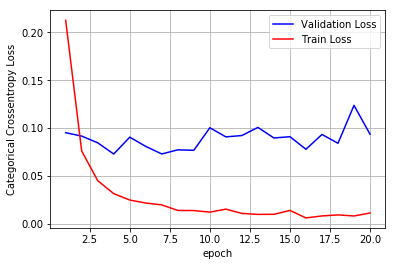

In [133]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'output layer ')

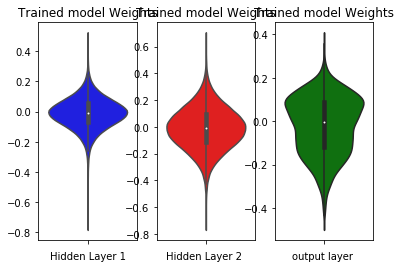

In [134]:
# Weights after trainning
#       1   2   3
# input->h1->h2->output
w_after = model_relu.get_weights()
# if 2 hidden layer then
# w_after[0]is the inpupt layer weights        w_after[1]is the input layer bias weights    input to hidden1
# w_after[2]is the hidde layer weights        w_after[3]is the hidde layer bias weights      hidde1 to hidden2
# w_after[4]is the hidde layer weights        w_after[5]is the hidde layer bias weights      hidde2 to output
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='g')
plt.xlabel('output layer ')


<h2> 2. MLP + ReLU + adam + batch__normalization</h2>

---



In [96]:

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_5 (Batch (None, 610)               2440      
_________________________________________________________________
dense_56 (Dense)             (None, 325)               198575    
_________________________________________________________________
batch_normalization_6 (Batch (None, 325)               1300      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                3260      
Total params: 684,425
Trainable params: 682,555
Non-trainable params: 1,870
_________________________________________________________________


In [97]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1828 - acc: 0.9454 - val_loss: 0.1113 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0665 - acc: 0.9795 - val_loss: 0.0807 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0423 - acc: 0.9878 - val_loss: 0.0852 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.1041 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0232 - acc: 0.9931 - val_loss: 0.0737 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0783 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0188 - acc: 0.9939 - val_loss: 0.0964 - val_acc

Train score: 0.0035421317501584024
Train accuracy: 99.88666666666667

************************ *********************

Test score: 0.07983259213970796
Test accuracy: 98.22999999999999


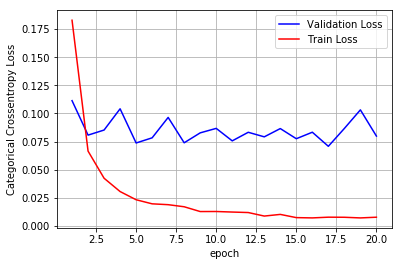

In [98]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_batch.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'output layer ')

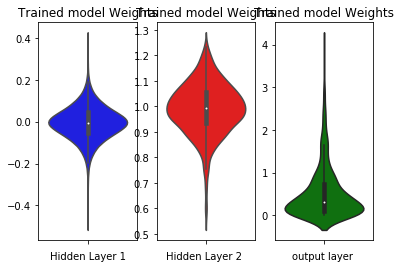

In [99]:
# Weights after trainning
#       1   2   3
# input->h1->h2->output
w_after = model_batch.get_weights()
# if 2 hidden layer then
# w_after[0]is the inpupt layer weights        w_after[1]is the input layer bias weights    input to hidden1
# w_after[2]is the hidde layer weights        w_after[3]is the hidde layer bias weights      hidde1 to hidden2
# w_after[4]is the hidde layer weights        w_after[5]is the hidde layer bias weights      hidde2 to output
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='g')
plt.xlabel('output layer ')


<h2> 3. MLP + ReLU + adam + dropout</h2>

---



In [100]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 610)               478850    
_________________________________________________________________
dropout_3 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 325)               198575    
_________________________________________________________________
dropout_4 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                3260      
Total params: 680,685
Trainable params: 680,685
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0490 - acc: 0.9868 - val_loss: 0.0916 - val_acc: 0.9831
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0520 - acc: 0.9855 - val_loss: 0.0914 - val_acc: 0.9806
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0505 - acc: 0.9858 - val_loss: 0.0950 - val_acc: 0.9795
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0525 - acc: 0.9854 - val_loss: 0.0960 - val_acc: 0.9812
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0503 - acc: 0.9861 - val_loss: 0.0875 - val_acc: 0.9820
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0467 - acc: 0.9863 - val_loss: 0.0889 - val_acc: 0.9825
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0485 - acc: 0.9865 - val_loss: 0.0857 - val_acc

Train score: 0.004207986781747021
Train accuracy: 99.88333333333334

************************ *********************

Test score: 0.08921634422981774
Test accuracy: 98.31


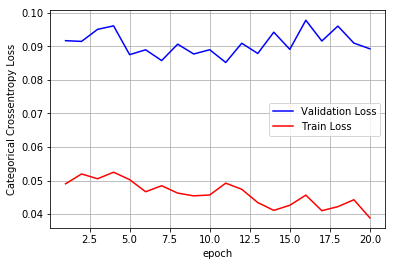

In [105]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

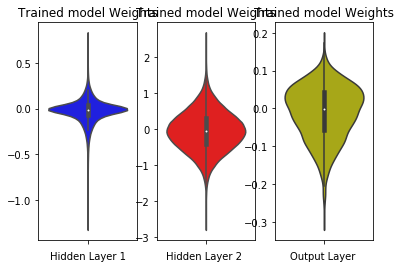

In [106]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 4. MLP + ReLU + adam + dropout+ batch_normalization</h2>

---



In [107]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_7 (Batch (None, 610)               2440      
_________________________________________________________________
dropout_5 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 325)               198575    
_________________________________________________________________
batch_normalization_8 (Batch (None, 325)               1300      
_________________________________________________________________
dropout_6 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                3260      
Total para

In [108]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4413 - acc: 0.8667 - val_loss: 0.1449 - val_acc: 0.9550
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2196 - acc: 0.9331 - val_loss: 0.1119 - val_acc: 0.9646
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1736 - acc: 0.9466 - val_loss: 0.1005 - val_acc: 0.9689
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1536 - acc: 0.9518 - val_loss: 0.0898 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1305 - acc: 0.9603 - val_loss: 0.0826 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1228 - acc: 0.9612 - val_loss: 0.0729 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1124 - acc: 0.9642 - val_loss: 0.0731 - val_acc

Train score: 0.017524294732744843
Train accuracy: 99.43666666666667

************************ *********************

Test score: 0.06593394307172858
Test accuracy: 98.06


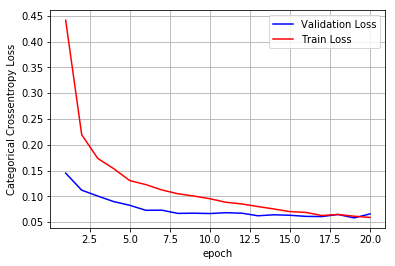

In [109]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

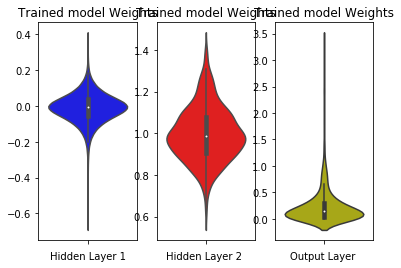

In [110]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 2 ->  with 3  Hidden layers

<h2> 1. MLP + ReLU + adam </h2>

---



In [111]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 610)               478850    
_________________________________________________________________
dense_65 (Dense)             (None, 420)               256620    
_________________________________________________________________
dense_66 (Dense)             (None, 210)               88410     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                2110      
Total params: 825,990
Trainable params: 825,990
Non-trainable params: 0
_________________________________________________________________


In [112]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2283 - acc: 0.9317 - val_loss: 0.1170 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0790 - acc: 0.9756 - val_loss: 0.1085 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0545 - acc: 0.9825 - val_loss: 0.0945 - val_acc: 0.9714
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0739 - val_acc: 0.9794
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0753 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0899 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0228 - acc: 0.9924 - val_loss: 0.1040 - val_acc

Train score: 0.007237614044734012
Train accuracy: 99.78666666666666

************************ *********************

Test score: 0.10040943191677561
Test accuracy: 97.96000000000001


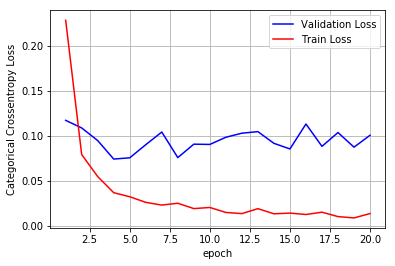

In [113]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

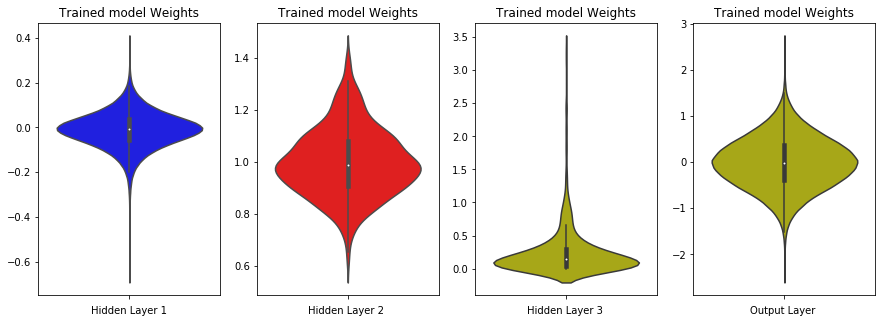

In [117]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2. MLP + ReLU + adam +batch_normalization</h2>

---



In [135]:

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_12 (Batc (None, 610)               2440      
_________________________________________________________________
dense_76 (Dense)             (None, 420)               256620    
_________________________________________________________________
batch_normalization_13 (Batc (None, 420)               1680      
_________________________________________________________________
dense_77 (Dense)             (None, 210)               88410     
_________________________________________________________________
batch_normalization_14 (Batc (None, 210)               840       
_________________________________________________________________
dense_78 (Dense)             (None, 10)                2110      
Total para

In [136]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1892 - acc: 0.9437 - val_loss: 0.1007 - val_acc: 0.9676
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0688 - acc: 0.9793 - val_loss: 0.0889 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0869 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0327 - acc: 0.9896 - val_loss: 0.0758 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0271 - acc: 0.9912 - val_loss: 0.0836 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0776 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0191 - acc: 0.9934 - val_loss: 0.0807 - val_ac

Train score: 0.0049123632065258185
Train accuracy: 99.86

************************ *********************

Test score: 0.08521870328055128
Test accuracy: 98.13


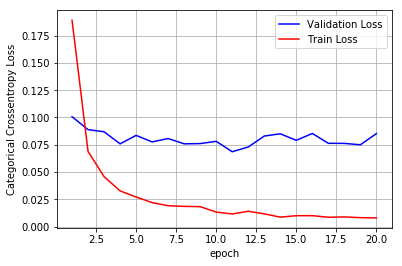

In [137]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_batch.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

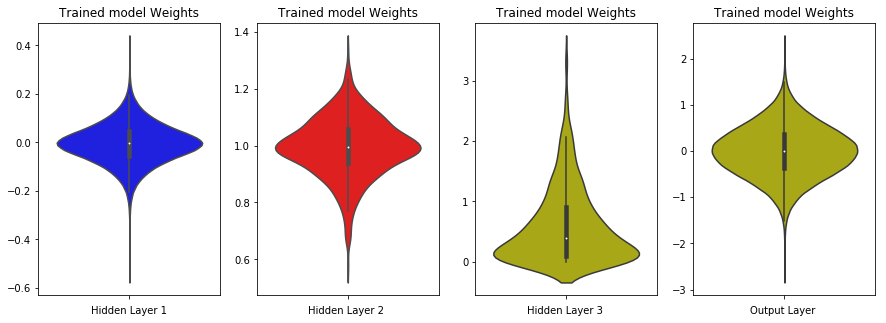

In [138]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3. MLP + ReLU + adam +dropout</h2>

---



In [139]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 610)               478850    
_________________________________________________________________
dropout_7 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 420)               256620    
_________________________________________________________________
dropout_8 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 210)               88410     
_________________________________________________________________
dropout_9 (Dropout)          (None, 210)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 10)                2110      
Total para

In [140]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 11.1512 - acc: 0.2983 - val_loss: 7.3193 - val_acc: 0.5437
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 7.7638 - acc: 0.5111 - val_loss: 5.3495 - val_acc: 0.6641
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 6.2760 - acc: 0.6051 - val_loss: 4.4822 - val_acc: 0.7197
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 5.5289 - acc: 0.6528 - val_loss: 4.3106 - val_acc: 0.7305
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 5.2546 - acc: 0.6708 - val_loss: 4.2082 - val_acc: 0.7373
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 5.0519 - acc: 0.6835 - val_loss: 4.2471 - val_acc: 0.7354
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 4.8966 - acc: 0.6935 - val_loss: 4.0780 - val_ac

Train score: 1.2961381546263884
Train accuracy: 91.88166666666666

************************ *********************

Test score: 1.2714586354423316
Test accuracy: 92.02


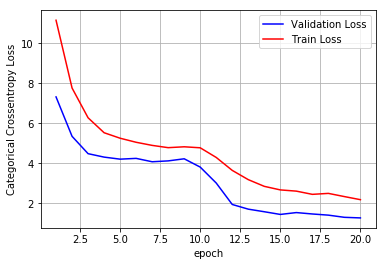

In [141]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

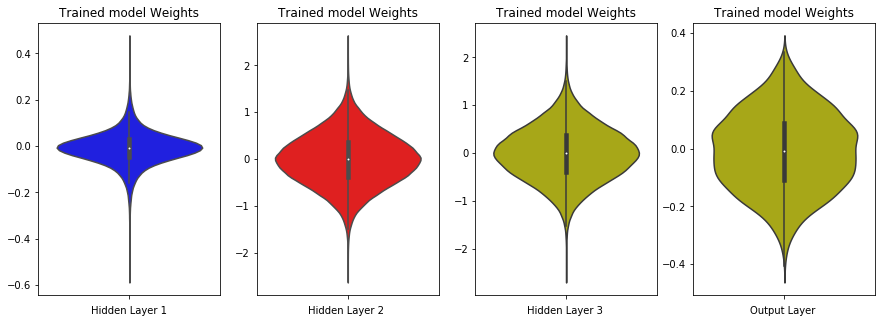

In [142]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 4. MLP + ReLU + adam +dropout+batch_normalization</h2>

---



In [143]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_15 (Batc (None, 610)               2440      
_________________________________________________________________
dropout_10 (Dropout)         (None, 610)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 420)               256620    
_________________________________________________________________
batch_normalization_16 (Batc (None, 420)               1680      
_________________________________________________________________
dropout_11 (Dropout)         (None, 420)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 210)               88410     
__________

In [144]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.6685 - acc: 0.7927 - val_loss: 0.1875 - val_acc: 0.9410
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3027 - acc: 0.9084 - val_loss: 0.1479 - val_acc: 0.9537
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2374 - acc: 0.9285 - val_loss: 0.1183 - val_acc: 0.9642
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2073 - acc: 0.9391 - val_loss: 0.1079 - val_acc: 0.9660
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1733 - acc: 0.9479 - val_loss: 0.0912 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1592 - acc: 0.9524 - val_loss: 0.0884 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1485 - acc: 0.9557 - val_loss: 0.0820 - val_ac

Train score: 0.01929794440046729
Train accuracy: 99.36500000000001

************************ *********************

Test score: 0.06535992648077081
Test accuracy: 98.27


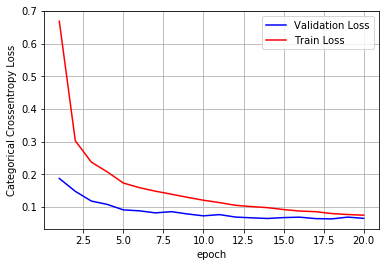

In [145]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

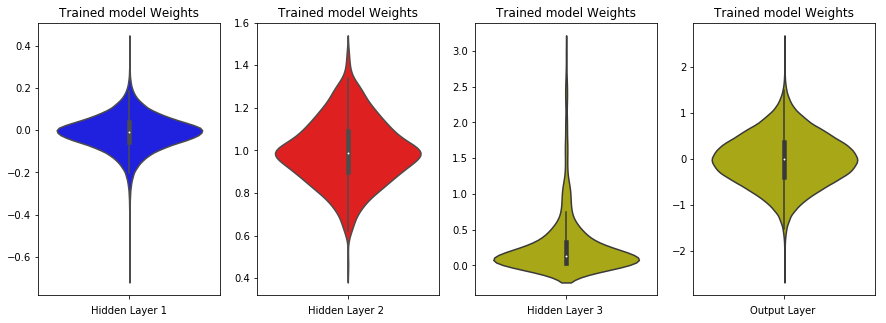

In [146]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 3 ->  with 5  Hidden layers

<h2> 1. MLP + ReLU + adam </h2>

---



In [156]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 690)               541650    
_________________________________________________________________
dense_100 (Dense)            (None, 530)               366230    
_________________________________________________________________
dense_101 (Dense)            (None, 412)               218772    
_________________________________________________________________
dense_102 (Dense)            (None, 231)               95403     
_________________________________________________________________
dense_103 (Dense)            (None, 112)               25984     
_________________________________________________________________
dense_104 (Dense)            (None, 10)                1130      
Total params: 1,249,169
Trainable params: 1,249,169
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.3034 - acc: 0.9205 - val_loss: 0.1320 - val_acc: 0.9589
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1008 - acc: 0.9691 - val_loss: 0.1004 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0715 - acc: 0.9776 - val_loss: 0.1130 - val_acc: 0.9669
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0555 - acc: 0.9824 - val_loss: 0.1049 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0505 - acc: 0.9839 - val_loss: 0.1075 - val_acc: 0.9696
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0422 - acc: 0.9864 - val_loss: 0.0840 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0354 - acc: 0.9887 - val_loss: 0.0893 - val_ac

Train score: 0.013096415554758278
Train accuracy: 99.61

************************ *********************

Test score: 0.09643159816987372
Test accuracy: 97.84


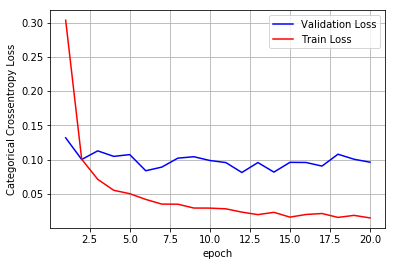

In [158]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

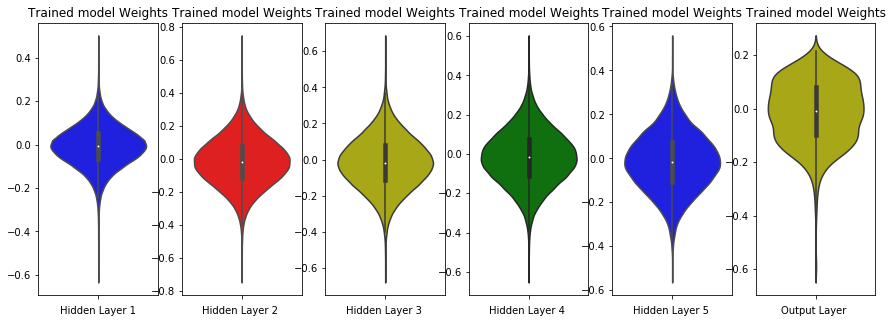

In [159]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2. MLP + ReLU + adam +batch_normalization</h2>

---



In [160]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 690)               541650    
_________________________________________________________________
batch_normalization_23 (Batc (None, 690)               2760      
_________________________________________________________________
dense_106 (Dense)            (None, 530)               366230    
_________________________________________________________________
batch_normalization_24 (Batc (None, 530)               2120      
_________________________________________________________________
dense_107 (Dense)            (None, 412)               218772    
_________________________________________________________________
batch_normalization_25 (Batc (None, 412)               1648      
_________________________________________________________________
dense_108 (Dense)            (None, 231)               95403     
__________

In [161]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2029 - acc: 0.9385 - val_loss: 0.1053 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0765 - acc: 0.9756 - val_loss: 0.0890 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0531 - acc: 0.9833 - val_loss: 0.0825 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0428 - acc: 0.9858 - val_loss: 0.0864 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0352 - acc: 0.9882 - val_loss: 0.0795 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0325 - acc: 0.9893 - val_loss: 0.0863 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0295 - acc: 0.9900 - val_loss: 0.0747 -

Train score: 0.005804570060232557
Train accuracy: 99.81166666666667

************************ *********************

Test score: 0.07293605055603548
Test accuracy: 98.1


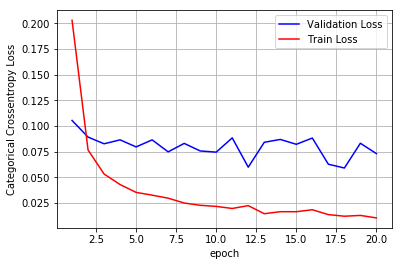

In [162]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

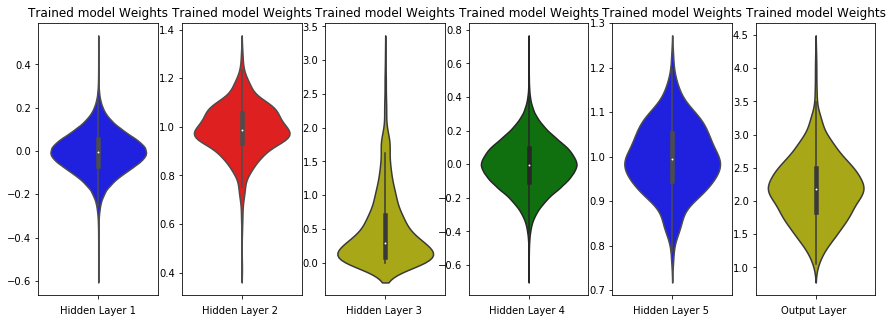

In [163]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3. MLP + ReLU + adam + dropout</h2>

---



In [164]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 690)               541650    
_________________________________________________________________
dropout_13 (Dropout)         (None, 690)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 530)               366230    
_________________________________________________________________
dropout_14 (Dropout)         (None, 530)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 412)               218772    
_________________________________________________________________
dropout_15 (Dropout)         (None, 412)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 231)               95403     
__________

In [165]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 6.6817 - acc: 0.2389 - val_loss: 1.4769 - val_acc: 0.5440
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.3284 - acc: 0.5313 - val_loss: 0.6585 - val_acc: 0.8469
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.7840 - acc: 0.7597 - val_loss: 0.4164 - val_acc: 0.8985
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.5498 - acc: 0.8459 - val_loss: 0.2908 - val_acc: 0.9215
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4436 - acc: 0.8826 - val_loss: 0.2400 - val_acc: 0.9386
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3852 - acc: 0.9027 - val_loss: 0.2093 - val_acc: 0.9478
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3475 - acc: 0.9126 - val_loss: 0.1893 - val_ac

Train score: 0.06778361755032092
Train accuracy: 98.285

************************ *********************

Test score: 0.11925422782022506
Test accuracy: 97.1


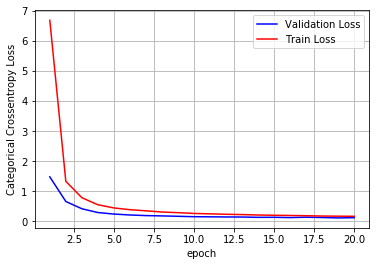

In [166]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

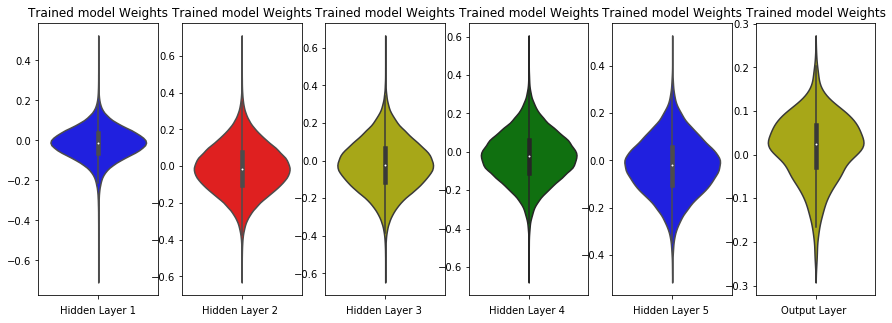

In [167]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 4. MLP + ReLU + adam + dropout + batch_normalization</h2>

---



In [168]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 690)               541650    
_________________________________________________________________
batch_normalization_28 (Batc (None, 690)               2760      
_________________________________________________________________
dropout_18 (Dropout)         (None, 690)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 530)               366230    
_________________________________________________________________
batch_normalization_29 (Batc (None, 530)               2120      
_________________________________________________________________
dropout_19 (Dropout)         (None, 530)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 412)               218772    
__________

In [169]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 182us/step - loss: 1.0551 - acc: 0.6702 - val_loss: 0.2329 - val_acc: 0.9293
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3650 - acc: 0.8925 - val_loss: 0.1617 - val_acc: 0.9511
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2638 - acc: 0.9258 - val_loss: 0.1304 - val_acc: 0.9640
Epoch 4/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2179 - acc: 0.9392 - val_loss: 0.1127 - val_acc: 0.9680
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1867 - acc: 0.9473 - val_loss: 0.1113 - val_acc: 0.9688
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1719 - acc: 0.9511 - val_loss: 0.0982 - val_acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1535 - acc: 0.9566 - val_loss: 0.0894 -

Train score: 0.020443898621193755
Train accuracy: 99.40833333333333

************************ *********************

Test score: 0.06300594019405543
Test accuracy: 98.37


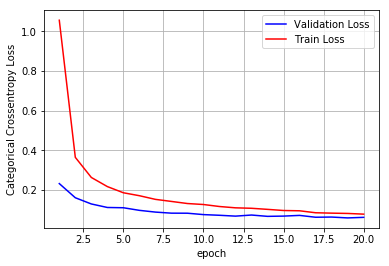

In [170]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)

#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', score[0]) 
print('Train accuracy:', score[1]*100)

print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

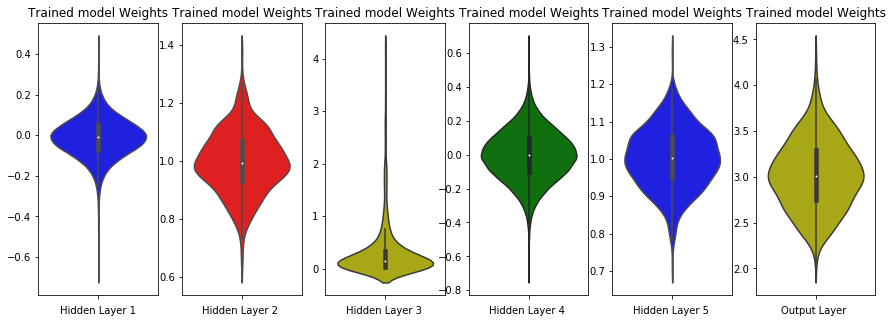

In [171]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# COMPARE THE RESULTS IN PRETTY TABLE

---



In [183]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["2", "MLP + ADAM + RELU",98.00])
tb.add_row(["2", "MLP + ADAM + RELU + batch_normalization",98.23])
tb.add_row(["2", "MLP + ADAM + RELU + dropout",98.31])
tb.add_row(["2", "MLP + ADAM + RELU + dropout+ batch_normalization",98.06])
tb.add_row([" ", " "," "])
tb.add_row([" ", " "," "])

tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["3", "MLP + ADAM + RELU",97.96])
tb.add_row(["3", "MLP + ADAM + RELU + batch_normalization",98.13])
tb.add_row(["3", "MLP + ADAM + RELU + dropout",92.02])
tb.add_row(["3", "MLP + ADAM + RELU + dropout+ batch_normalization",98.27])
tb.add_row([" ", " "," "])
tb.add_row([" ", " "," "])

tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["5", "MLP + ADAM + RELU",97.84])
tb.add_row(["5", "MLP + ADAM + RELU + batch_normalization",98.1])
tb.add_row(["5", "MLP + ADAM + RELU + dropout",97.1])
tb.add_row(["5", "MLP + ADAM + RELU + dropout+ batch_normalization",98.37])





print(tb.get_string(titles = "MLP Models - Observations"))

+---------------+--------------------------------------------------+----------+
| Hidden Layers |                      Model                       | Accuracy |
+---------------+--------------------------------------------------+----------+
|       2       |                MLP + ADAM + RELU                 |   98.0   |
|       2       |     MLP + ADAM + RELU + batch_normalization      |  98.23   |
|       2       |           MLP + ADAM + RELU + dropout            |  98.31   |
|       2       | MLP + ADAM + RELU + dropout+ batch_normalization |  98.06   |
|               |                                                  |          |
|               |                                                  |          |
|       3       |                MLP + ADAM + RELU                 |  97.96   |
|       3       |     MLP + ADAM + RELU + batch_normalization      |  98.13   |
|       3       |           MLP + ADAM + RELU + dropout            |  92.02   |
|       3       | MLP + ADAM + RELU + dr